In [1]:
import pandas as pd

from mitotic_classifer import *


# Running SVM model with file:
# 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
# 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs
# 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs

In [3]:
df_ori_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')

df_ori_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_final_data.csv')
df_cellcyle_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_singlecell_cellcycle.csv')
df_ori_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_final_data.csv')
df_cellcyle_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_singlecell_cellcycle.csv')

# 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#

In [10]:
# print(df_cellcyle_230109.groupby('cell_cycle').count())
df_all_p1=merge_data(df1=df_ori_221108_P1,df2=df_cellcyle_221108_P1,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
# print(df_cellcyle_230109.groupby('cell_cycle').count())
df_all_230109=merge_data(df1=df_ori_230109,df2=df_cellcyle_230109,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p1.groupby('cell_cycle_detailed').count()
df_all_230109.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551,...,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,...,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800
Late S,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,...,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215
M,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [11]:
data=pd.concat([df_all_p1[df_all_p1['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,RPE-1,QRICH1,93.0,194.0,1.801905e+06,1.801905e+06,14947.084403,1536.628214,14947.084403,9288.170229,...,5871.834596,8192.278576,1,1998,3.915272,1.043762,1.734185,1.187960,G2,G2/M
1,U2OS,C14orf80,384.0,208.0,2.392532e+06,2.392532e+06,16513.110717,4152.911235,16513.110717,11502.555297,...,8462.177600,13205.168784,1,878,3.757402,0.953039,1.010403,1.238977,G2,G2/M
2,U2OS,INHBE,554.0,199.0,2.032204e+06,2.032204e+06,15409.827585,2050.162347,15409.827585,10212.078969,...,5528.976808,8782.997012,1,1616,3.191518,1.027754,1.859693,1.185368,G2,G2/M
3,MM231,ZMAT5,142.0,100.0,1.736204e+06,1.736204e+06,25562.082377,5239.871841,25562.082377,17362.044949,...,13329.253060,22282.104179,1,467,3.308498,1.099211,0.909530,0.913061,G2,G2/M
4,U2OS,CPSF2,205.0,359.0,3.291776e+06,3.291776e+06,12673.178270,1846.437865,12673.178270,9169.292663,...,5183.565152,7713.683717,1,3495,5.169640,1.032965,4.022047,2.138427,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,RPE-1,CPSF2,324.0,297.0,1.759177e+06,1.759177e+06,8627.420869,1414.562846,8627.420869,5923.154566,...,5557.761011,8184.941105,1,2992,3.822430,0.983426,2.596938,1.818681,G2,G2/M
63363,MM231,C1orf131,418.0,124.0,1.971133e+06,1.971133e+06,21064.524171,6486.145867,21064.524171,15896.235292,...,9800.612605,14899.912876,1,399,3.756176,0.999183,0.777093,1.132196,M,G2/M
63364,U2OS,CPSF2,722.0,219.0,2.528608e+06,2.528608e+06,15661.479775,3393.757626,15661.479775,11546.156453,...,5352.634075,10587.126204,1,1058,3.971107,0.999752,1.217547,1.304500,G2,G2/M
63365,MM231,CDC27,136.0,156.0,2.430858e+06,2.430858e+06,23567.328187,6159.841878,23567.328187,15582.420653,...,14101.532679,29453.967967,1,587,4.632224,0.921086,1.143242,1.424376,G2,G2/M


# pre-trained SVM
# without Edu

accuracy 0.3362375533428165


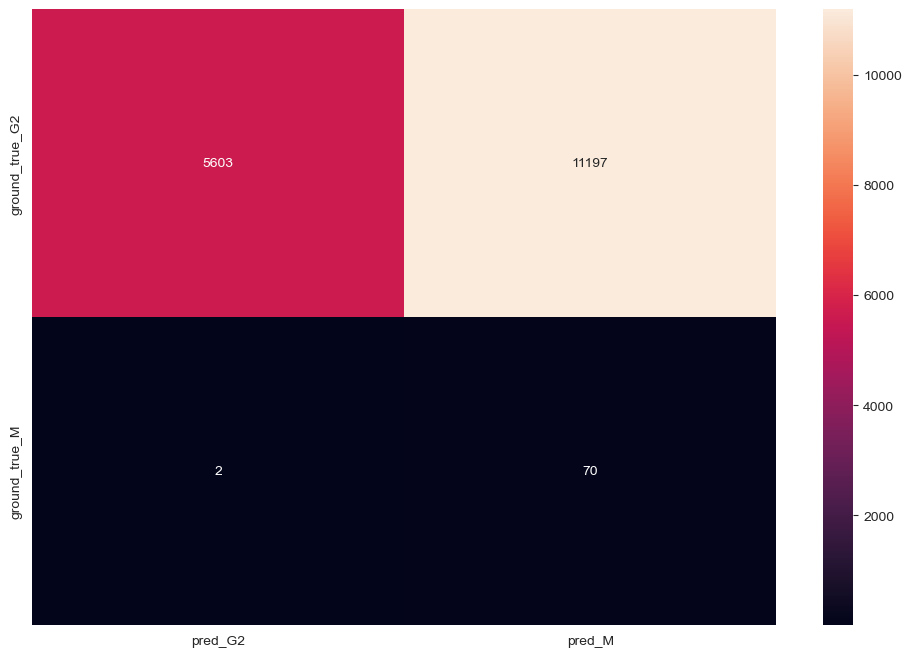

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,TAK931_12h,86.0,547.0,2.676891e+06,2.676891e+06,7817.368864,1035.847303,7817.368864,4893.768206,...,12797.512763,1,8180,4.483950,0.986062,5.932713,3.609835,G2,G2/M,M
1,RPE-1,NT,49.0,176.0,2.332224e+06,2.332224e+06,19945.313778,3666.678454,19945.313778,13251.274277,...,17579.396596,1,987,3.906612,1.119412,0.715842,1.161482,G2,G2/M,M
2,RPE-1,TAK931_24h,104.0,250.0,2.263741e+06,2.263741e+06,58252.670092,2643.203638,13008.952200,9054.963692,...,13370.869833,1,1883,3.791899,0.975891,1.365684,1.649833,G2,G2/M,M
3,RPE-1,1NM_12h,171.0,129.0,2.436420e+06,2.436420e+06,33528.115038,5399.465000,33528.115038,18886.979839,...,19772.973569,1,643,4.081147,1.299727,0.466349,0.851314,G2,G2/M,M
4,RPE-1,DMSO,106.0,249.0,2.514610e+06,2.514610e+06,15448.087739,3835.335417,15448.087739,10098.834766,...,12919.883467,1,1055,4.212119,0.983993,0.765160,1.643234,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_24h,100.0,332.0,2.973984e+06,2.973984e+06,14537.779299,2760.403560,14537.779299,8957.782869,...,15025.000136,1,651,4.981597,1.000199,0.472151,2.190978,G2,G2/M,G2
16868,RPE-1,1NM_24h,153.0,228.0,2.831772e+06,2.831772e+06,24308.810892,2249.315139,24308.810892,12420.052900,...,20369.204336,1,2386,4.743384,1.087097,1.730495,1.504648,G2,G2/M,M
16869,RPE-1,1NM_24h,20.0,236.0,2.595812e+06,2.595812e+06,18720.883251,2236.605030,18720.883251,10999.204018,...,19997.344284,1,2013,4.348137,1.070147,1.459969,1.557442,G2,G2/M,M
16870,RPE-1,Palb_24h,193.0,286.0,2.832460e+06,2.832460e+06,15321.573580,2697.433016,15321.573580,9903.706610,...,12882.276959,1,1718,4.744537,0.996441,1.246015,1.887409,G2,G2/M,G2


In [5]:


data_without_edu=check_pretrained_model(data=data,pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_without_edu

# include EdU

accuracy 0.3560929350403035


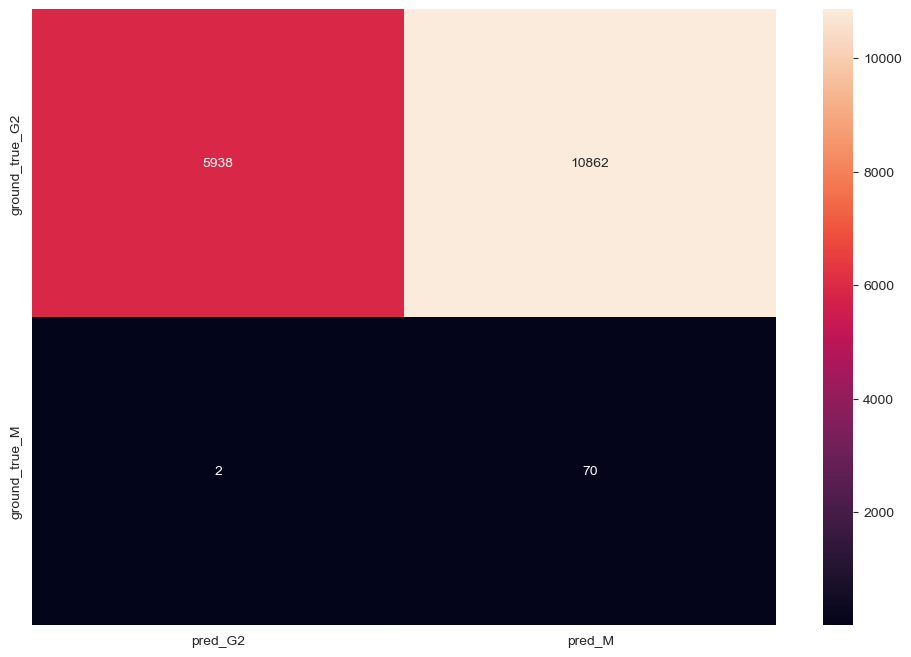

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,TAK931_12h,86.0,547.0,2.676891e+06,2.676891e+06,7817.368864,1035.847303,7817.368864,4893.768206,...,12797.512763,1,8180,4.483950,0.986062,5.932713,3.609835,G2,G2/M,G2
1,RPE-1,NT,49.0,176.0,2.332224e+06,2.332224e+06,19945.313778,3666.678454,19945.313778,13251.274277,...,17579.396596,1,987,3.906612,1.119412,0.715842,1.161482,G2,G2/M,M
2,RPE-1,TAK931_24h,104.0,250.0,2.263741e+06,2.263741e+06,58252.670092,2643.203638,13008.952200,9054.963692,...,13370.869833,1,1883,3.791899,0.975891,1.365684,1.649833,G2,G2/M,M
3,RPE-1,1NM_12h,171.0,129.0,2.436420e+06,2.436420e+06,33528.115038,5399.465000,33528.115038,18886.979839,...,19772.973569,1,643,4.081147,1.299727,0.466349,0.851314,G2,G2/M,M
4,RPE-1,DMSO,106.0,249.0,2.514610e+06,2.514610e+06,15448.087739,3835.335417,15448.087739,10098.834766,...,12919.883467,1,1055,4.212119,0.983993,0.765160,1.643234,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_24h,100.0,332.0,2.973984e+06,2.973984e+06,14537.779299,2760.403560,14537.779299,8957.782869,...,15025.000136,1,651,4.981597,1.000199,0.472151,2.190978,G2,G2/M,M
16868,RPE-1,1NM_24h,153.0,228.0,2.831772e+06,2.831772e+06,24308.810892,2249.315139,24308.810892,12420.052900,...,20369.204336,1,2386,4.743384,1.087097,1.730495,1.504648,G2,G2/M,M
16869,RPE-1,1NM_24h,20.0,236.0,2.595812e+06,2.595812e+06,18720.883251,2236.605030,18720.883251,10999.204018,...,19997.344284,1,2013,4.348137,1.070147,1.459969,1.557442,G2,G2/M,M
16870,RPE-1,Palb_24h,193.0,286.0,2.832460e+06,2.832460e+06,15321.573580,2697.433016,15321.573580,9903.706610,...,12882.276959,1,1718,4.744537,0.996441,1.246015,1.887409,G2,G2/M,M


In [6]:
data_with_edu=check_pretrained_model(data,pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_with_edu

In [8]:
data_with_edu[data_with_edu['cell_cycle_detailed']=="M"]

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
163,RPE-1,Palb_12h,76.0,126.0,2.281455e+06,2.281455e+06,29379.670390,2798.967591,29379.670390,18106.784357,...,22364.805609,1,1336,3.821570,1.207125,0.968961,0.831516,M,G2/M,M
327,RPE-1,1NM_12h,140.0,294.0,2.769129e+06,2.769129e+06,17176.667250,2672.314307,17176.667250,9418.806105,...,9435.926036,1,1518,4.638453,1.020750,1.100961,1.940204,M,G2/M,G2
353,RPE-1,NT,219.0,109.0,2.187683e+06,2.187683e+06,37013.272384,5823.669696,37013.272384,20070.483036,...,24891.975581,1,564,3.664497,1.063419,0.409053,0.719327,M,G2/M,M
594,RPE-1,Palb_12h,35.0,157.0,2.386580e+06,2.386580e+06,23059.675531,5097.578627,23059.675531,15201.148211,...,20393.179592,1,730,3.997662,1.079460,0.529447,1.036095,M,G2/M,M
847,RPE-1,DMSO,194.0,146.0,2.857616e+06,2.857616e+06,34442.353343,8868.553459,34442.353343,19572.712308,...,18954.855472,1,415,4.786674,1.040661,0.300987,0.963503,M,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,RPE-1,DMSO,30.0,148.0,2.241639e+06,2.241639e+06,20672.246542,4890.406758,20672.246542,15146.212328,...,31317.880354,1,616,3.754877,1.048202,0.446767,0.976701,M,G2/M,M
15708,RPE-1,TAK931_24h,30.0,111.0,2.348024e+06,2.348024e+06,40296.781362,5668.645897,40296.781362,21153.366770,...,33973.608829,1,719,3.933077,1.050168,0.521469,0.732526,M,G2/M,M
15801,RPE-1,Palb_12h,254.0,103.0,2.828300e+06,2.828300e+06,50061.682320,6961.030359,50061.682320,27459.222022,...,20771.394763,1,688,4.737568,1.011824,0.498986,0.679731,M,G2/M,M
15839,RPE-1,NT,61.0,162.0,1.895739e+06,1.895739e+06,16772.957128,3757.599448,16772.957128,11702.093566,...,18618.588840,1,720,3.175474,1.081970,0.522195,1.069092,M,G2/M,M


# classification  of G1 S and G2/M
# without Edu

In [ ]:
data_G1_S_G2_M=pd.concat([df_all[df_all['cell_cycle']=="G2/M"].head(5766),df_all[df_all['cell_cycle_detailed']=="G1"].head(5766),df_all[df_all['cell_cycle']=="S"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle']].sample(frac=1).reset_index(drop=True)



x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


# with Edu

In [ ]:
x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
